In [55]:
# importing data libraries
import pandas as pd
import numpy as np
import pickle

# importing graphic libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# importing pre-processing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# importing machine learning libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# importing evaluation libraries
from sklearn.metrics import accuracy_score, classification_report

In [56]:
# importing database
base_inicial = pd.read_csv('/datasets/credit_data.csv')
base_inicial.head()

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [57]:
# statistical initial informations about dataset
base_inicial.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


Problems:
*   o age feature has 3 missing values
*   There is negative age on dataset



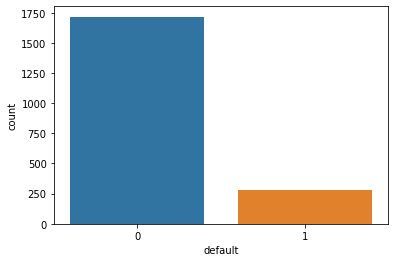

In [58]:
# getting informations about default
sns.countplot(x=base_inicial['default']);

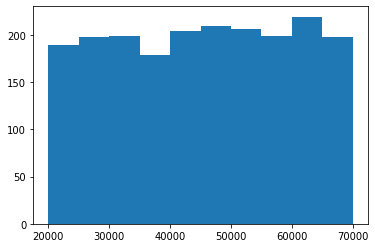

In [59]:
# getting graphcal informations about income
plt.hist(x=base_inicial['income']);

# Pre-Processing



In [60]:
# Now its time to start clearning the dataset
# Let's find people who has negative age
base_inicial.loc[base_inicial['age']<0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [61]:
# replacing negative ages for the mean age
base_inicial.loc[base_inicial['age']<0, 'age'] = base_inicial['age'][base_inicial['age']>0].mean()
base_inicial.head(27)

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
5,6,24904.064140,57.471607,15.498598,0
6,7,48430.359613,26.809132,5722.581981,0
7,8,24500.141984,32.897548,2971.003310,1
8,9,40654.892537,55.496853,4755.825280,0
9,10,25075.872771,39.776378,1409.230371,0


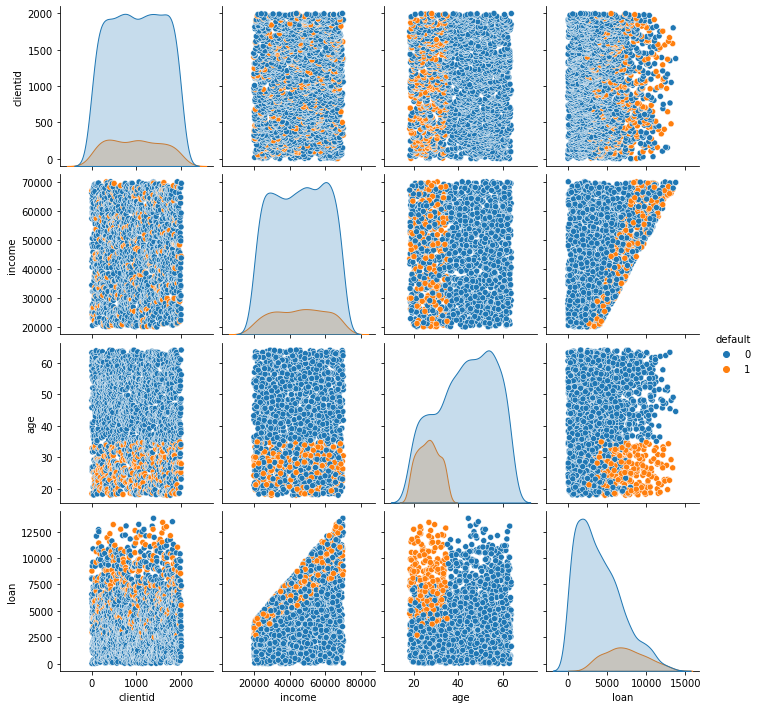

In [62]:
# viewing graphcaly data
sns.pairplot(base_inicial, hue='default')

Insights
*   As we saw in the image, people who are between 18 and 35 with arrearage above of 7K tend not to repay the loan.




In [63]:
# treating the missing values
base_inicial.isnull().sum() # counting missing data per features

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [64]:
# replacing missing data for the mean
base_inicial['age'].fillna(base_inicial['age'].mean(), inplace=True)
base_inicial.isnull().sum()

clientid    0
income      0
age         0
loan        0
default     0
dtype: int64

In [65]:
x = base_inicial.iloc[:,1:4].values
y = base_inicial.iloc[:,4].values

print(f'x = {x.shape} \ny = {y.shape}')

x = (2000, 3) 
y = (2000,)


In [66]:
scaler_base = StandardScaler()
base_scaled = scaler_base.fit_transform(x)
base_scaled

array([[ 1.45393393,  1.36538005,  1.20281942],
       [-0.76217555,  0.54265932,  0.69642695],
       [ 0.83682073,  1.67417101,  1.17471147],
       ...,
       [-0.07122592, -0.97448606,  0.35420081],
       [-0.11000289,  1.73936652, -0.92675625],
       [ 1.682986  ,  1.14917551,  0.96381038]])

In [67]:
# dividing data between training and test sets
# Test data: 25%
# Training data: 75%

x_train, x_test, y_train, y_test = train_test_split(base_scaled, y, test_size=0.25, random_state=0)

In [68]:
print(f'training:\nx_train={x_train.shape} y_train={y_train.shape}\ntest:\nx_test={x_test.shape} y_test={y_test.shape}')

training:
x_train=(1500, 3) y_train=(1500,)
test:
x_test=(500, 3) y_test=(500,)


In [69]:
# salving pre-processed data
import pickle
with open('/content/loan_base.pkl', mode='wb') as f:
  pickle.dump([x_train, y_train, x_test, y_test], f)

# Machine Learning

### Naive Bayes

In [70]:
import pickle
with open('loan_base.pkl', 'rb') as f:
  x_train, y_train, x_test, y_test = pickle.load(f)

In [71]:
# training naive-bayes algorithm
base_emprestimo = GaussianNB()
base_emprestimo.fit(x_train, y_train) 

# testing database
prev_naive = base_emprestimo.predict(x_test)

# evaluating
print(f'Acc: {accuracy_score(y_test, prev_naive)}')

Acc: 0.938


In [72]:
print(classification_report(y_test, prev_naive))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500



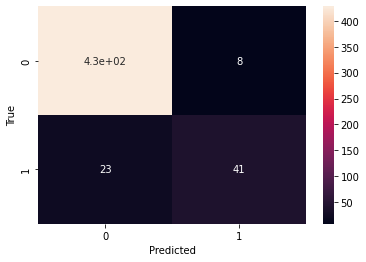

In [73]:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.crosstab(y_test, prev_naive, rownames=['True'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)
plt.show()

### Random Forest

In [74]:
import pickle
with open('loan_base.pkl', 'rb') as f:
  x_train, y_train, x_test, y_test = pickle.load(f)

In [75]:
base_RF = RandomForestClassifier(n_estimators=50, criterion='entropy', random_state=0)
base_RF.fit(x_train, y_train)

prev_RF = base_RF.predict(x_test)

print(f'Acc: {accuracy_score(y_test, prev_RF)}')

Acc: 0.98


In [76]:
print(classification_report(y_test, prev_RF))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       436
           1       0.95      0.89      0.92        64

    accuracy                           0.98       500
   macro avg       0.97      0.94      0.95       500
weighted avg       0.98      0.98      0.98       500



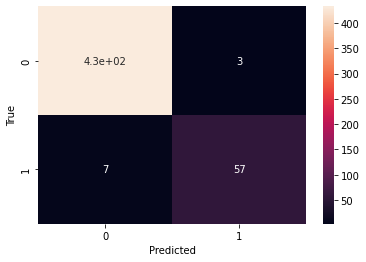

In [77]:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.crosstab(y_test, prev_RF, rownames=['True'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)
plt.show()

### KNN

In [78]:
import pickle
with open('loan_base.pkl', 'rb') as f:
  x_train, y_train, x_test, y_test = pickle.load(f)

In [79]:
base_knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
base_knn.fit(x_train, y_train)

prev_knn = base_knn.predict(x_test)

print(f'Acc: {accuracy_score(y_test, prev_knn)}')
print(classification_report(y_test, prev_knn))

Acc: 0.986
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.94      0.95      0.95        64

    accuracy                           0.99       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.99      0.99      0.99       500



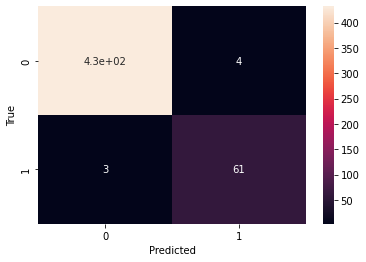

In [80]:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.crosstab(y_test, prev_knn, rownames=['True'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)
plt.show()

### Logistic Regression

In [81]:
import pickle
with open('loan_base.pkl', 'rb') as f:
  x_train, y_train, x_test, y_test = pickle.load(f)

In [82]:
base_logistic = LogisticRegression(random_state=1)
base_logistic.fit(x_train, y_train)

prev_logistic = base_logistic.predict(x_test)

print(f'Acc: {accuracy_score(y_test, prev_logistic)}')
print(classification_report(y_test, prev_logistic))

Acc: 0.946
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       436
           1       0.79      0.78      0.79        64

    accuracy                           0.95       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.95      0.95      0.95       500



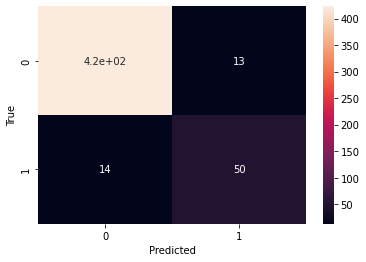

In [83]:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.crosstab(y_test, prev_logistic, rownames=['True'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)
plt.show()

### SVM

In [84]:
import pickle
with open('loan_base.pkl', 'rb') as f:
  x_train, y_train, x_test, y_test = pickle.load(f)

In [85]:
base_svm = SVC(kernel="rbf", random_state=1, C=2.0)
base_svm.fit(x_train, y_train)

prev_svm = base_svm.predict(x_test)

print(f'Acc: {accuracy_score(y_test, prev_svm)}')
print(classification_report(y_test, prev_svm))

Acc: 0.988
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       436
           1       0.97      0.94      0.95        64

    accuracy                           0.99       500
   macro avg       0.98      0.97      0.97       500
weighted avg       0.99      0.99      0.99       500



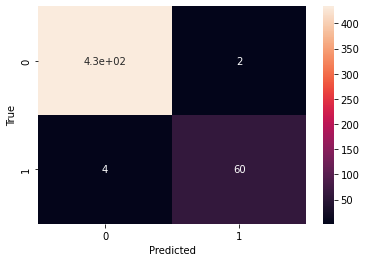

In [86]:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.crosstab(y_test, prev_svm, rownames=['True'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)
plt.show()

### Redes Neurais

In [87]:
import pickle
with open('loan_base.pkl', 'rb') as f:
  x_train, y_train, x_test, y_test = pickle.load(f)

In [88]:
# calculating num of neurons
# (num_inputs + num_output_layers) / num_hidden_layers
# (3 + 1)/2 = 2
base_mlp = MLPClassifier(max_iter=3000, verbose=True, tol=0.00000100, 
                         solver = 'adam', activation = 'relu', 
                         hidden_layer_sizes = (2,2))

base_mlp.fit(x_train, y_train)

Iteration 1, loss = 1.73952405
Iteration 2, loss = 1.72152575
Iteration 3, loss = 1.70399701
Iteration 4, loss = 1.68637208
Iteration 5, loss = 1.66890098
Iteration 6, loss = 1.65189754
Iteration 7, loss = 1.63491528
Iteration 8, loss = 1.61814929
Iteration 9, loss = 1.60146012
Iteration 10, loss = 1.58501573
Iteration 11, loss = 1.56860658
Iteration 12, loss = 1.55256727
Iteration 13, loss = 1.53669107
Iteration 14, loss = 1.52081870
Iteration 15, loss = 1.50516261
Iteration 16, loss = 1.48951744
Iteration 17, loss = 1.47410022
Iteration 18, loss = 1.45881949
Iteration 19, loss = 1.44374227
Iteration 20, loss = 1.42866234
Iteration 21, loss = 1.41357048
Iteration 22, loss = 1.39862451
Iteration 23, loss = 1.38390350
Iteration 24, loss = 1.36854559
Iteration 25, loss = 1.35317141
Iteration 26, loss = 1.33792542
Iteration 27, loss = 1.32282002
Iteration 28, loss = 1.30739212
Iteration 29, loss = 1.29269155
Iteration 30, loss = 1.27790449
Iteration 31, loss = 1.26352223
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(2, 2), max_iter=3000, tol=1e-06, verbose=True)

In [89]:
prev_mlp = base_mlp.predict(x_test)

print(f'Acc: {accuracy_score(y_test, prev_mlp)}')
print(classification_report(y_test, prev_mlp))

Acc: 0.998
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       436
           1       0.98      1.00      0.99        64

    accuracy                           1.00       500
   macro avg       0.99      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



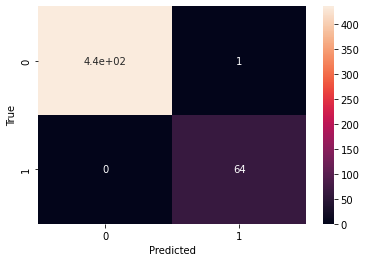

In [90]:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.crosstab(y_test, prev_mlp, rownames=['True'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)
plt.show()